In [1]:
#hide
from utils import *

### Running your first notebook

In [2]:
# CLICK ME
from fastai2.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.174299,0.028499,0.012179,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.067669,0.024392,0.007442,00:33


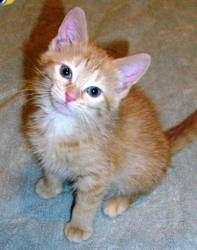

In [10]:
img = PILImage.create('images/chapter1_cat_example.jpg')
img.to_thumb(256)

In [11]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

Is this a cat?: True.
Probability it's a cat: 0.971060


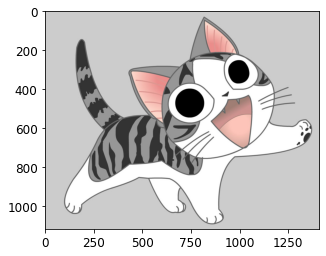

In [13]:
img = PILImage.create(uploader.data[0])
plt.imshow(img)
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

## Deep learning is not just for image classification

In [15]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.592028,2.015663,00:01


epoch,train_loss,valid_loss,time
0,1.535288,1.384202,00:02
1,1.342597,1.027686,00:02
2,1.373585,1.292729,00:02
3,1.284050,0.909697,00:02
4,1.171851,0.855641,00:02
5,1.071934,0.768846,00:02
6,0.987927,0.740330,00:02
7,0.921061,0.734250,00:02


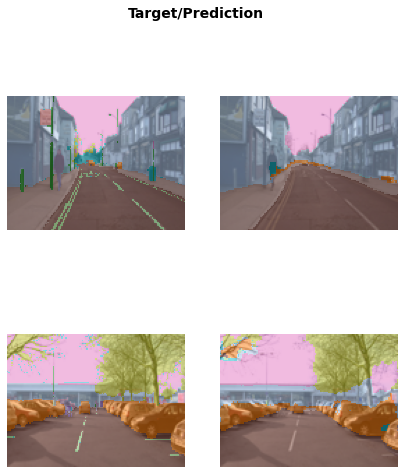

In [16]:
learn.show_results(max_n=6, figsize=(7,8))

In [17]:
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.594188,0.387410,0.826320,02:22


epoch,train_loss,valid_loss,accuracy,time
0,0.292036,0.249391,0.896880,04:39
1,0.214597,0.222320,0.912720,04:45
2,0.163800,0.195256,0.925440,04:33
3,0.135887,0.198492,0.926080,04:43


If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [18]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0133, 0.9867]))

In [19]:
learn.predict("The movie was a joke")

('pos', tensor(1), tensor([0.2869, 0.7131]))

In [21]:
learn.predict("The movie was pathetic")

('neg', tensor(0), tensor([0.6412, 0.3588]))

In [22]:
learn.predict("I wish more movies were like this one")

('pos', tensor(1), tensor([0.0293, 0.9707]))

In [23]:
learn.predict("I'd rather spend time jogging than watching this movie")

('neg', tensor(0), tensor([0.9784, 0.0216]))

In [24]:
from fastai2.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [25]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.370749,0.374896,0.823403,00:09
1,0.349100,0.366090,0.827242,00:11
2,0.339405,0.364781,0.828010,00:09


In [26]:
from fastai2.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.510696,1.396345,00:00


epoch,train_loss,valid_loss,time
0,1.370590,1.335533,00:00
1,1.271237,1.149576,00:00
2,1.030388,0.843070,00:00
3,0.795293,0.712823,00:01
4,0.691296,0.684625,00:01
5,0.658775,0.676029,00:01
6,0.629376,0.673340,00:01
7,0.628156,0.671049,00:01
8,0.615262,0.670127,00:01
9,0.624575,0.670000,00:01


In [27]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,76.0,20.0,3.0,3.468229
1,2.0,98.0,4.5,4.193963
2,4.0,85.0,3.5,3.852789
3,73.0,23.0,2.0,3.001018
4,53.0,50.0,5.0,4.095848
5,33.0,31.0,3.5,3.992814
6,66.0,49.0,4.0,4.083266
7,57.0,64.0,4.0,3.563442
8,97.0,40.0,3.5,3.381307
